In [1]:
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

In [147]:
radius = 1
n_points = 8 * radius
grid_X, grid_Y = 16,16
method='uniform'

In [148]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_01 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0001.jpg')

In [149]:
img = plt.imread(putin_01)
# numPoints = 24
# radius = 3
# n_points = 8 * radius
# lbp = feature.local_binary_pattern(img, n_points, radius, method="uniform")

In [150]:
def criaGrid(img, grid_X, grid_Y, ax, color='r', linestyle='--', linewidth=1):
    w, h = img.shape
    nrows = int(w/grid_X)
    ncols = int(w/grid_X)
    for i in range(1, nrows):
        ax.axhline(y=i*grid_X, xmin=0, xmax=w, color=color, linestyle=linestyle, linewidth=linewidth)
        ax.axvline(x=i*grid_Y, ymin=0, ymax=h, color=color, linestyle=linestyle, linewidth=linewidth) 
    return ax

<AxesSubplot:>

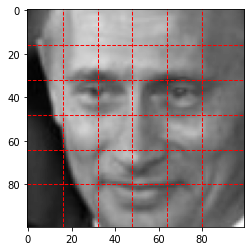

In [151]:
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
criaGrid(img, grid_X, grid_Y, ax, color='r', linestyle='--')

In [152]:
import itertools
def cartesian_product_itertools(arrays):
    return numpy.array(list(itertools.product(*arrays)))

In [153]:
w,h = img.shape
grids = []
grid_X, grid_Y = 8,8
pairs_x = [(grid_X*i, grid_X*(i+1)) for i in range(int(w/grid_X)-1)]
pairs_y = [(grid_Y*i, grid_Y*(i+1)) for i in range(int(h/grid_Y)-1)]
pairs = []
for pair_y in pairs_y:
    for pair_x in pairs_x:
        pairs.append((pair_x, pair_y))

In [154]:

hists = []
for pair in pairs:
#     print(pair)
    section = img[pair[0][0]:pair[0][1], pair[1][0]:pair[1][1]]
    lbp_section = feature.local_binary_pattern(section, n_points, radius, method=method)
    (hist, _) = np.histogram(lbp_section.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    eps = 1e-6
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    hists.append(hist)

(array([5., 1., 3., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.053125  , 0.10625   , 0.159375  , 0.2125    ,
        0.265625  , 0.31875   , 0.37187499, 0.42499999, 0.47812499,
        0.53124999]),
 <BarContainer object of 10 artists>)

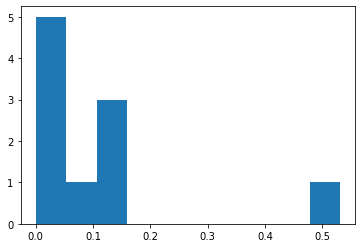

In [155]:
plt.hist(hists[0])

(array([1., 2., 1., 0., 3., 0., 0., 1., 0., 2.]),
 array([0.03125 , 0.046875, 0.0625  , 0.078125, 0.09375 , 0.109375,
        0.125   , 0.140625, 0.15625 , 0.171875, 0.1875  ]),
 <BarContainer object of 10 artists>)

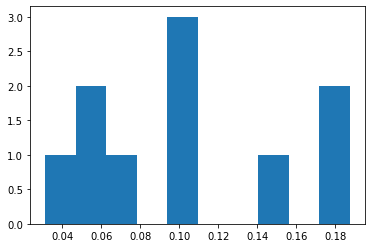

In [156]:
plt.hist(hists[4])

<BarContainer object of 1210 artists>

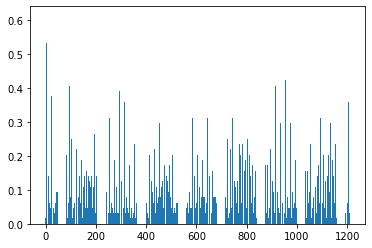

In [157]:
val = np.hstack(hists)
x = range(len(val))
plt.bar(x,val)

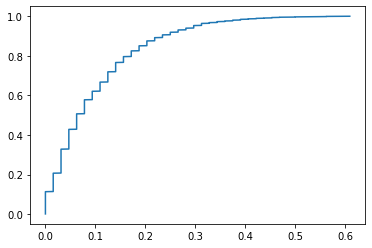

In [158]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf = ECDF(val)
plt.plot(cdf.x, cdf.y, label="statmodels", markerfacecolor='none')

In [159]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_21 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0021.jpg')
img21 = plt.imread(putin_21)

<AxesSubplot:>

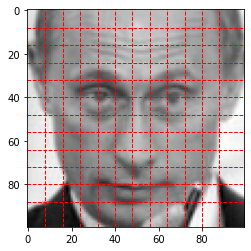

In [160]:
fig, ax = plt.subplots(1)
ax.imshow(img21, cmap='gray')

criaGrid(img21, grid_X, grid_Y, ax, color='r', linestyle='--')

In [161]:
w,h = img21.shape
grids = []
grid_X, grid_Y = 8,8
pairs_x = [(grid_X*i, grid_X*(i+1)) for i in range(int(w/grid_X)-1)]
pairs_y = [(grid_Y*i, grid_Y*(i+1)) for i in range(int(h/grid_Y)-1)]
pairs = []
for pair_y in pairs_y:
    for pair_x in pairs_x:
        pairs.append((pair_x, pair_y))

In [162]:
hists21 = []
for pair in pairs:
#     print(pair)
    section = img21[pair[0][0]:pair[0][1], pair[1][0]:pair[1][1]]
    lbp_section = feature.local_binary_pattern(section, n_points, radius, method=method)
    (hist, _) = np.histogram(lbp_section.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    eps = 1e-6
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    hists21.append(hist)

<BarContainer object of 1210 artists>

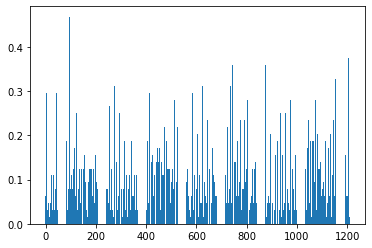

In [163]:
val21 = np.hstack(hists21)
x = range(len(val21))
plt.bar(x,val21)

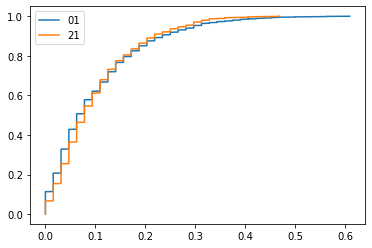

In [164]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf21 = ECDF(val21)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y,label='21')
plt.legend()

# testing Aaron Sorkin

In [165]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
aaron = Path(lfw2_crop, 'Aaron_Sorkin', 'Aaron_Sorkin_0001.jpg')
aaron = plt.imread(aaron)

<AxesSubplot:>

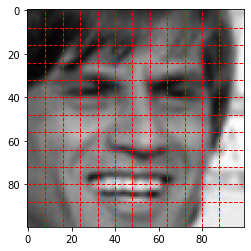

In [166]:
fig, ax = plt.subplots(1)
ax.imshow(aaron, cmap='gray')
criaGrid(aaron, grid_X, grid_Y, ax, color='r', linestyle='--')

In [167]:
w,h = aaron.shape
grids = []
grid_X, grid_Y = 8,8
pairs_x = [(grid_X*i, grid_X*(i+1)) for i in range(int(w/grid_X)-1)]
pairs_y = [(grid_Y*i, grid_Y*(i+1)) for i in range(int(h/grid_Y)-1)]
pairs = []
for pair_y in pairs_y:
    for pair_x in pairs_x:
        pairs.append((pair_x, pair_y))

In [168]:
aaronHists = []
for pair in pairs:
#     print(pair)
    section = aaron[pair[0][0]:pair[0][1], pair[1][0]:pair[1][1]]
    lbp_section = feature.local_binary_pattern(section, n_points, radius, method=method)
    (hist, _) = np.histogram(lbp_section.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    eps = 1e-6
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    aaronHists.append(hist)

<BarContainer object of 1210 artists>

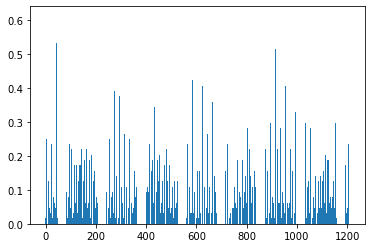

In [169]:
aaronVals = np.hstack(aaronHists)
x = range(len(aaronVals))
plt.bar(x,aaronVals)

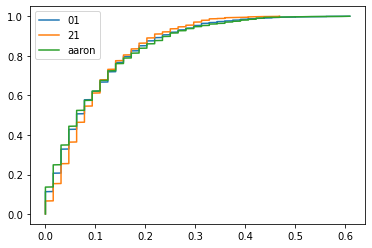

In [170]:
from statsmodels.distributions.empirical_distribution import ECDF
cdfaaronVals = ECDF(aaronVals)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.legend()

In [171]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdfaaronVals.x, cdfaaronVals.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

0.14062499780273446

In [172]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

0.14062499780273446

In [173]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

0.031249999511718807

# testing Aaron Sorkin 2

In [174]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
aaron2 = Path(lfw2_crop, 'Aaron_Sorkin', 'Aaron_Sorkin_0002.jpg')
aaron2 = plt.imread(aaron2)

<AxesSubplot:>

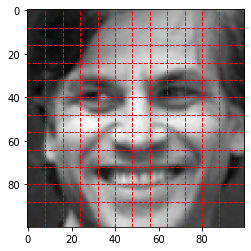

In [175]:
fig, ax = plt.subplots(1)
ax.imshow(aaron2, cmap='gray')
criaGrid(aaron2, grid_X, grid_Y, ax, color='r', linestyle='--')

In [176]:
w,h = aaron2.shape
grids = []
grid_X, grid_Y = 8,8
pairs_x = [(grid_X*i, grid_X*(i+1)) for i in range(int(w/grid_X)-1)]
pairs_y = [(grid_Y*i, grid_Y*(i+1)) for i in range(int(h/grid_Y)-1)]
pairs = []
for pair_y in pairs_y:
    for pair_x in pairs_x:
        pairs.append((pair_x, pair_y))

In [177]:
aaronHists2 = []
for pair in pairs:
#     print(pair)
    section = aaron2[pair[0][0]:pair[0][1], pair[1][0]:pair[1][1]]
    lbp_section = feature.local_binary_pattern(section, n_points, radius, method=method)
    (hist, _) = np.histogram(lbp_section.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    eps = 1e-6
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    aaronHists2.append(hist)

<BarContainer object of 1210 artists>

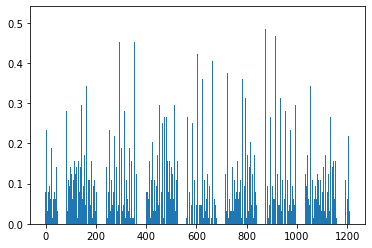

In [178]:
aaronVals2 = np.hstack(aaronHists2)
x = range(len(aaronVals2))
plt.bar(x,aaronVals2)

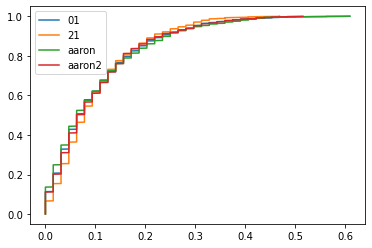

In [179]:
from statsmodels.distributions.empirical_distribution import ECDF
cdfaaronVals2 = ECDF(aaronVals2)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.plot(cdfaaronVals2.x, cdfaaronVals2.y, label='aaron2')
plt.legend()

In [180]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdfaaronVals.x, cdfaaronVals.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

0.14062499780273446

In [181]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

0.14062499780273446

In [182]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

0.031249999511718807

In [183]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdfaaronVals2.x, cdfaaronVals2.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

0.09374999853515631